In [1]:
%matplotlib inline

from scipy.io import arff
import numpy as np

# download from http://timeseriesclassification.com/description.php?Dataset=ECG5000
dataset_train, meta = arff.loadarff('./data/ECG5000/ECG5000_TRAIN.arff')

ds_train = np.asarray(dataset_train.tolist(), dtype=np.float32)
x_dataset = ds_train[:, :140]
y_dataset = np.asarray(ds_train[:,-1].tolist(), dtype=np.int8)-1

[0 0 0 0 0 0 0 0 0 0]


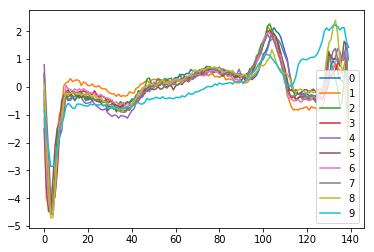

In [2]:
import matplotlib.pyplot as plt

N = 10
print(y_dataset[:N])
obj = plt.plot(x_dataset[:N].T)
plt.legend(obj, [str(n) for n in range(N)])

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_dataset[:,:,np.newaxis]
y_train = to_categorical(y_dataset)

print(x_train.shape)
print(y_train.shape)

(500, 140, 1)
(500, 5)


In [4]:
dataset_test, meta = arff.loadarff('./data/ECG5000/ECG5000_TEST.arff')
ds_test = np.asarray(dataset_test.tolist(), dtype=np.float32)

print(ds_test.shape)

(4500, 141)


In [5]:
x_test = ds_test[:, :140][:,:,np.newaxis]
y_test = to_categorical(np.asarray(ds_test[:,-1].tolist(), dtype=np.int8)-1)

print(x_test.shape)
print(y_test.shape)

(4500, 140, 1)
(4500, 5)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

model = Sequential()
model.add(SimpleRNN(hid_dim, input_shape=x_train.shape[1:]))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.fit(x_train, y_train,
          epochs=50, batch_size=100, verbose=2,
          validation_split=0.2)

Train on 400 samples, validate on 100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 1s - loss: 1.9762 - acc: 0.2000 - val_loss: 1.2430 - val_acc: 0.4800
Epoch 2/50
 - 0s - loss: 1.9121 - acc: 0.2325 - val_loss: 1.2100 - val_acc: 0.5000
Epoch 3/50
 - 1s - loss: 1.8505 - acc: 0.2500 - val_loss: 1.1801 - val_acc: 0.6000
Epoch 4/50
 - 0s - loss: 1.7908 - acc: 0.2675 - val_loss: 1.1534 - val_acc: 0.6400
Epoch 5/50
 - 1s - loss: 1.7336 - acc: 0.2825 - val_loss: 1.1295 - val_acc: 0.6600
Epoch 6/50
 - 1s - loss: 1.6769 - acc: 0.2900 - val_loss: 1.1086 - val_acc: 0.6700
Epoch 7/50
 - 0s - loss: 1.6237 - acc: 0.3050 - val_loss: 1.0901 - val_acc: 0.6700
Epoch 8/50
 - 0s - loss: 1.5708 - acc: 0.3150 - val_loss: 1.0742 - val_acc: 0.6700
Epoch 9/50
 - 0s - loss: 1.5209 - acc: 0.3250 - val_loss: 1.0604 - val_acc: 0.6700
Epoch 10/50
 - 0s - loss: 1.4704 - acc: 0.3300 - val_loss: 1.0486 - val_acc: 0.6800
Epoch 11/50
 - 0s - loss: 1.4223 - acc: 0.3400 - val_loss: 1.0387 - val_acc

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy,', score[1])

Test loss: 0.5085278123219807
Test accuracy, 0.896


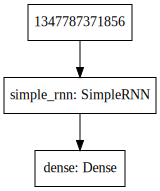

In [9]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________
